In [1]:
#upload csv file using pandas
import pandas as pd
data=pd.read_csv("titanic-passengers.csv",sep=";")
print("\n Display the first 10 features of the data frame: \n")
data.head(10)



 Display the first 10 features of the data frame: 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


In [64]:
print("General information about loaded data: \n")
data.info()

print("\n the total of null values by comumn: \n")
data.isnull().sum()

General information about loaded data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB

 the total of null values by comumn: 



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
#delete Cabine column 
data2=data.drop("Cabin",axis=1)
#delete all lnes that contain nan values
data2.dropna(axis=0, how="any",inplace=True)


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt



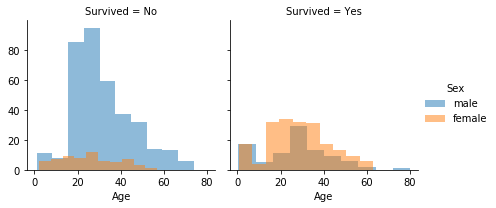

In [29]:
#correlation between survived, age and sex
grid=sns.FacetGrid(data2,col="Survived",hue="Sex")
grid.map(plt.hist,"Age",alpha=0.5)
grid.add_legend()

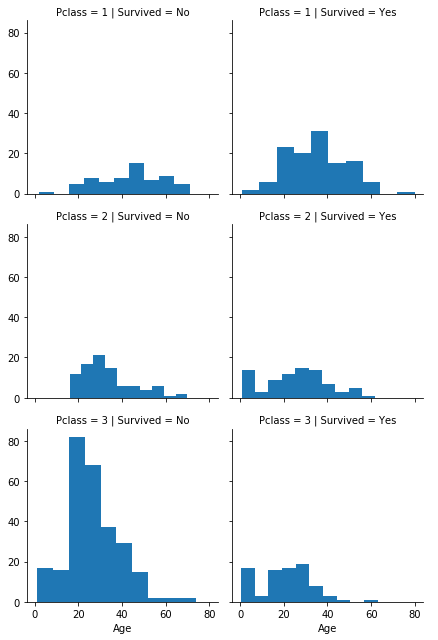

In [30]:
#correlation between Survived and pclass
grid=sns.FacetGrid(data2,col="Survived",row="Pclass")
grid.map(plt.hist,"Age")
grid.add_legend()
#the person on first class has more cance to survive then second and third class

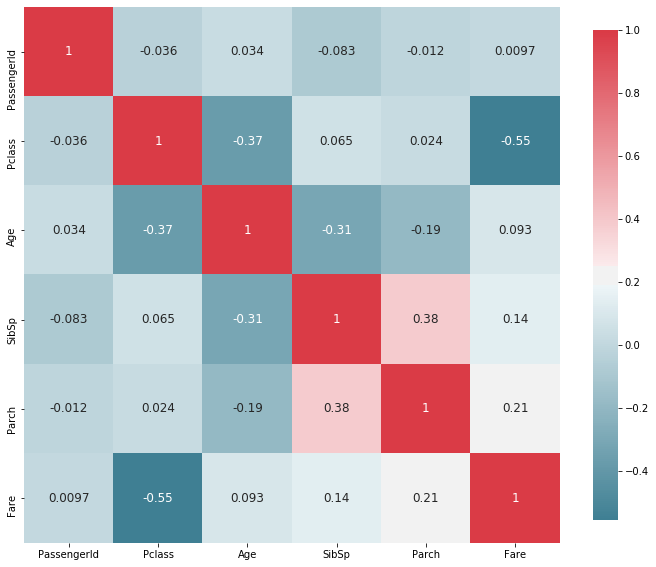

In [31]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(data2)  

In [32]:
# transform categorical variables into numerical to get correlation between all features
#data.Sex.unique()
#data.Survived.unique()
#apply label encoded to servived and sex field
trans_sur={"Survived":{"No":0,"Yes":1}}
trans_sex={"Sex":{"male":1,"female":0}}
trans_emb={"Embarked":{"C":1,"Q":2,"S":3}}
data2.replace(trans_sur,inplace=True)
data2.replace(trans_sex,inplace=True)
data2.replace(trans_emb,inplace=True)


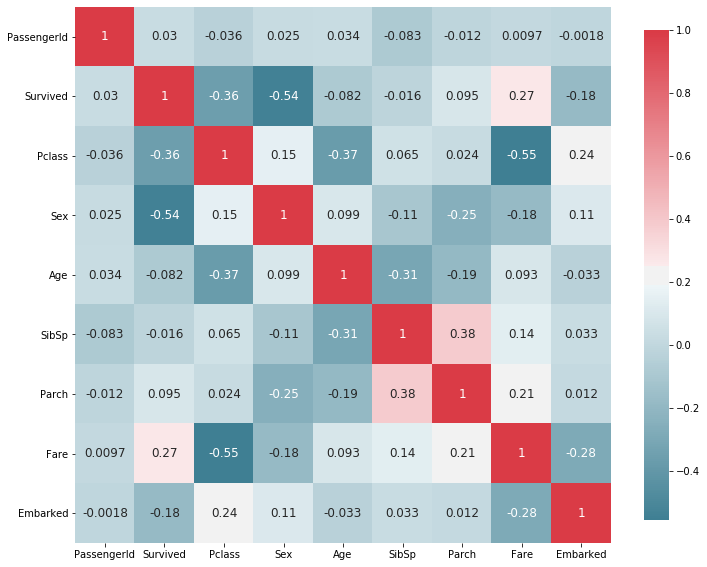

In [33]:
#plot_correlation_map call after data tranformation's step
plot_correlation_map(data2)


## interpretation of the correlation matrix
the correlation coefficient define the existence of a lineare relationship between two variables(continious one) 
so, from the heat map below, we can said that variable: 
+ Survived is negatively correlated  with Sex: we visualize the relationship between them in  graphs, so there are more women who have survived than men( women are represented by 0 value, which explain the negative correlation)
+ Survided is negatively correlated with Pclass: we visualize also this relationship in graphs, there are less survivors in class 3 than 2 and 1
+ Survived is not correlated with Age 
+ Survived is positively correlated with Fare variable, which is logical because Fare is negatively correlated with Pclass, so more the fare is important, more the passegenr has a chance to survived 


In [34]:
#track the relation between Pclass and Survived feature using groupby
data2[["Survived","Pclass"]].groupby(["Pclass"],as_index=True).mean()
#the lowest pourcetage of survivors was registred in the third class, the class of poor people !

,Survived
Pclass,
1,0.652174
2,0.479769
3,0.239437


In [50]:
#data2.drop("Title",axis=1)
#create new column Title
data2["Title"]= data2["Name"].apply(lambda row: (row.split(",")[1]).split(".")[0].strip())
data2["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Dr', 'Major', 'Don', 'Master', 'Rev', 'Col',
       'Mlle', 'Lady', 'Jonkheer', 'Mme', 'Sir', 'Capt', 'the Countess',
       'Ms'], dtype=object)

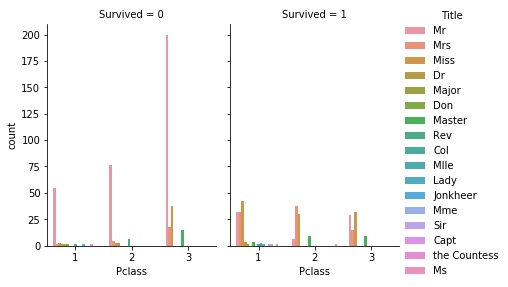

In [44]:

#correlation between survived, title and pclass
sns.catplot(x="Pclass", hue="Title", col="Survived",
                data=data2, kind="count",
                height=4, aspect=.7);

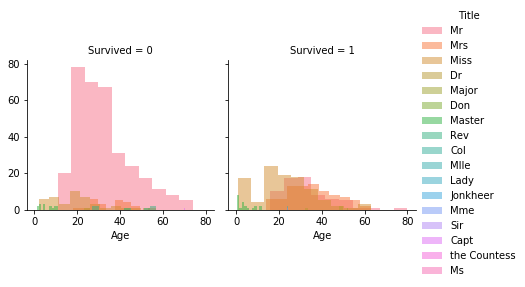

In [51]:
#correlation between survived, age and title
grid=sns.FacetGrid(data2,col="Survived",hue="Title")
grid.map(plt.hist,"Age",alpha=0.5)
grid.add_legend()

In [45]:
def get_new_title(title):
    switcher= {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Dr":         "Officer",
    "Rev":        "Officer",

    "Jonkheer":   "Royalty",

    "Don":        "Royalty",

    "Sir" :       "Royalty",

    "Lady" :      "Royalty",

    "the Countess": "Royalty",

    "Dona":       "Royalty",

    "Mme":        "Miss",

    "Mlle":       "Miss",

    "Miss" :      "Miss",

    "Ms":         "Mrs",

    "Mr" :        "Mrs",

    "Mrs" :       "Mrs",

    "Master" :    "Master"

                    }
    return switcher.get(title, "nothing")

data2["Title"]= data2["Title"].apply(get_new_title)

data2["Title"].unique()


array(['Mrs', 'Miss', 'Officer', 'Royalty', 'Master'], dtype=object)

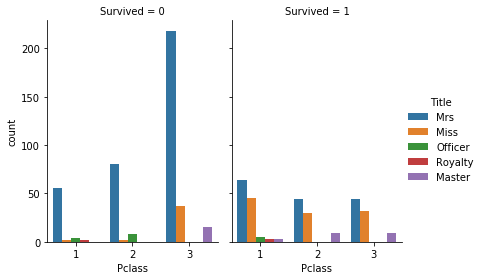

In [47]:
#correlation between survived, title and pclass
sns.catplot(x="Pclass", hue="Title", col="Survived",
                data=data2, kind="count",
                height=4, aspect=.7);

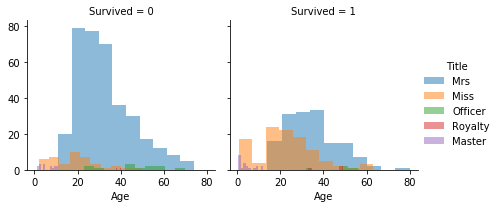

In [48]:
#correlation between survived, age and title
grid=sns.FacetGrid(data2,col="Survived",hue="Title")
grid.map(plt.hist,"Age",alpha=0.5)
grid.add_legend()